# Installing and importing libraries

In [406]:
 # Installing the required python libraries into the Colab Workspace
!pip install ucimlrepo
!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [594]:
# Importing the relevant libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
BLUE = "\033[94m"

# Importing and Preprocessing the data

In [697]:
# Loading and exploring the dataset's features using pandas
adult = fetch_ucirepo(id=2)
X = adult.data.features
Y = adult.data.targets
adult_data = pd.concat([X, Y], axis=1)

Handling the missing values

In [698]:
# Looping through each column to find which have missing values
for column in adult_data.columns:
    if adult_data[column].dtype == 'int64':
        zeros_count = (adult_data[column] == 0).sum()
        if zeros_count > 0:
            print(RED + f"The {column} column has {zeros_count} zeros, which is {((zeros_count/32561)*100).round(2)}%" + RESET)
        else:
            print(GREEN + "The " + column + " column doesn't have zeros." + RESET)
    else:
        question_marks_count = (adult_data[column] == "?").sum()
        nan_count = adult_data[column].isna().sum()
        if question_marks_count > 0 or nan_count > 0:
            print(RED + f"The {column} column has {question_marks_count} '?'s and {nan_count} nan values, which is {(((question_marks_count + nan_count)/32561)*100).round(2)}% " + RESET)
        else:
            print(GREEN + "The " + column + " column doesn't have '?'s. or nan values" + RESET)

The age column doesn't have zeros.
The workclass column has 1836 '?'s and 963 nan values, which is 8.6% 
The fnlwgt column doesn't have zeros.
The education column doesn't have '?'s. or nan values
The education-num column doesn't have zeros.
The marital-status column doesn't have '?'s. or nan values
The occupation column has 1843 '?'s and 966 nan values, which is 8.63% 
The relationship column doesn't have '?'s. or nan values
The race column doesn't have '?'s. or nan values
The sex column doesn't have '?'s. or nan values
The capital-gain column has 44807 zeros, which is 137.61%
The capital-loss column has 46560 zeros, which is 142.99%
The hours-per-week column doesn't have zeros.
The native-country column has 583 '?'s and 274 nan values, which is 2.63% 
The income column doesn't have '?'s. or nan values


In [699]:
# Removing the '?' and nan values from the dataset by imputing the mean for the missing values
# Removing the . from some values in the income column
for column in adult_data.columns:
  modal_value = adult_data[column].mode()[0]
  if adult_data[column].dtype == 'object':
    adult_data[column].replace("?", modal_value, inplace=True)
    adult_data[column].fillna(modal_value, inplace=True)
    adult_data[column].replace("<=50K.", "<=50K", inplace=True)
    adult_data[column].replace(">50K.", ">50K", inplace=True)

In [700]:
# Looping through each column to find which have missing values
for column in adult_data.columns:
    if adult_data[column].dtype == 'int64':
        # Ignore the missing integer values since there are none, capital gain and loss are correctly 0.
        continue
    else:
        question_marks_count = (adult_data[column] == "?").sum()
        nan_count = adult_data[column].isna().sum()
        if question_marks_count > 0 or nan_count > 0:
            print(RED + f"The {column} column has {question_marks_count} '?'s and {nan_count} nan values, which is {(((question_marks_count + nan_count)/32561)*100).round(2)}% " + RESET)
        else:
            print(GREEN + "The " + column + " column doesn't have '?'s or nan values." + RESET)

The workclass column doesn't have '?'s or nan values.
The education column doesn't have '?'s or nan values.
The marital-status column doesn't have '?'s or nan values.
The occupation column doesn't have '?'s or nan values.
The relationship column doesn't have '?'s or nan values.
The race column doesn't have '?'s or nan values.
The sex column doesn't have '?'s or nan values.
The native-country column doesn't have '?'s or nan values.
The income column doesn't have '?'s or nan values.


In [701]:
# Exploring all the unique values in the dataset
for column in adult_data.columns:
  print("\n\nUNIQUE VALUES OF THE", column, "COLUMN :")
  print(adult_data[column].unique())



UNIQUE VALUES OF THE age COLUMN :
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


UNIQUE VALUES OF THE workclass COLUMN :
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


UNIQUE VALUES OF THE fnlwgt COLUMN :
[ 77516  83311 215646 ... 173449  89686 350977]


UNIQUE VALUES OF THE education COLUMN :
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


UNIQUE VALUES OF THE education-num COLUMN :
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


UNIQUE VALUES OF THE marital-status COLUMN :
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


UNIQUE VALUES OF TH

Handling outlier using visualization and winsorization

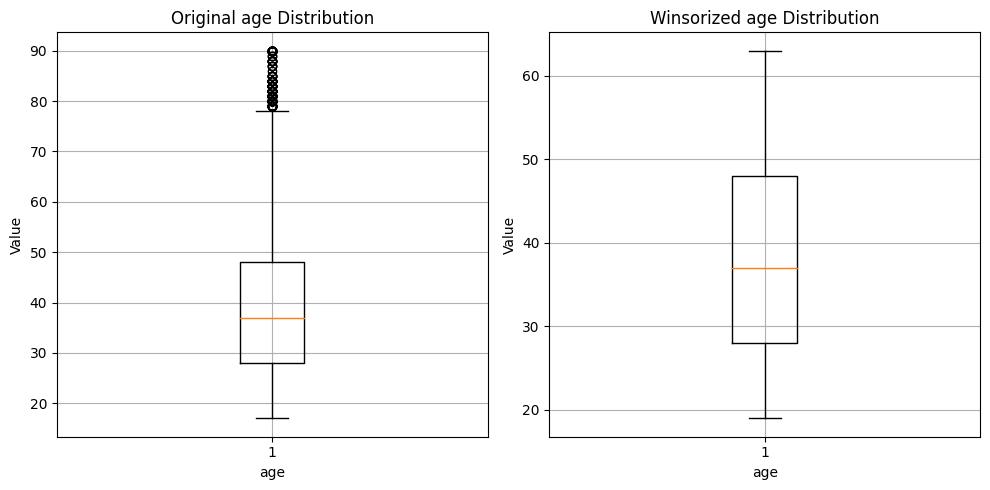

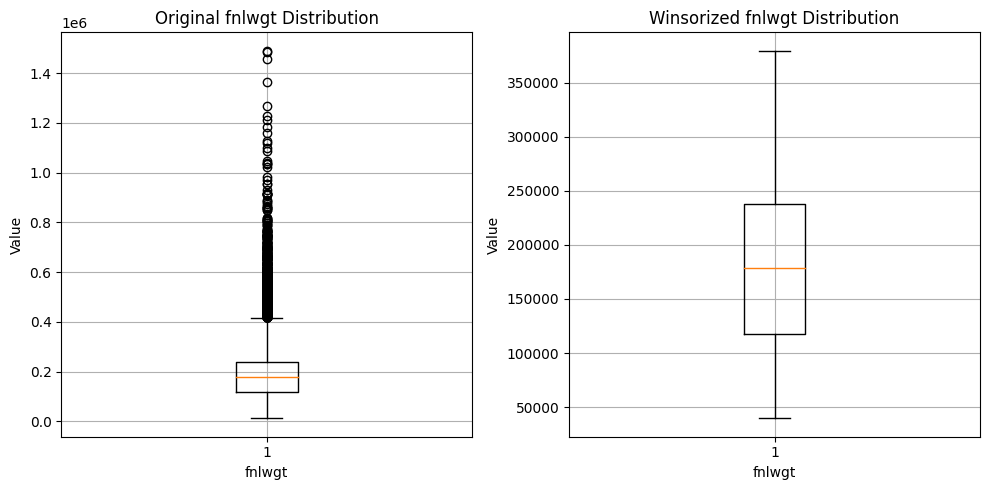

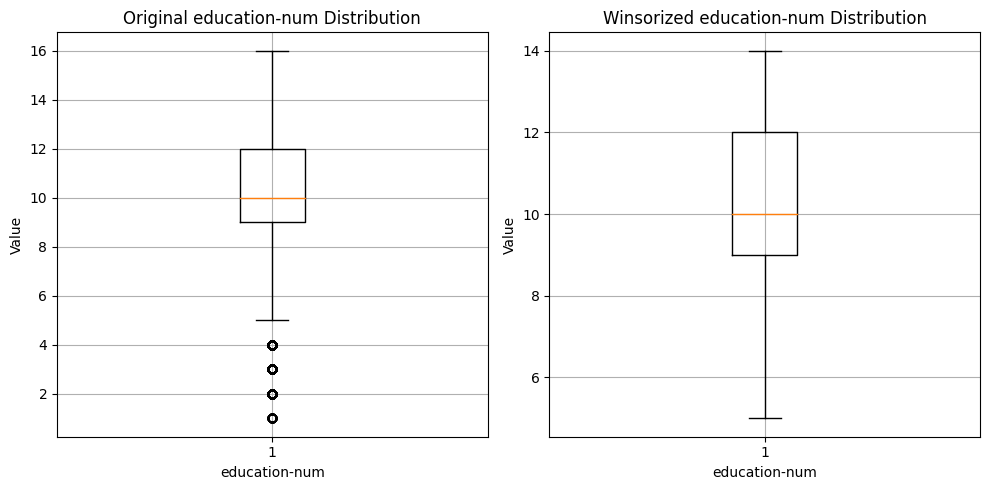

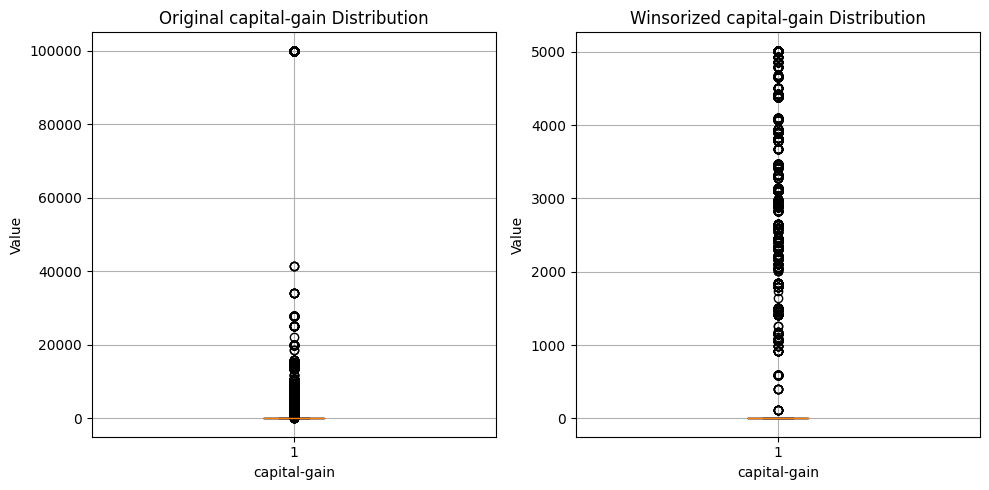

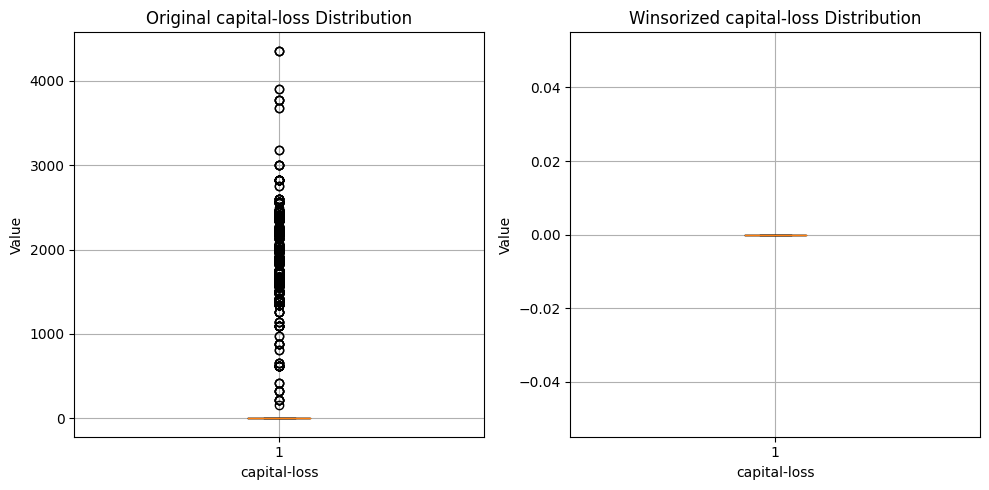

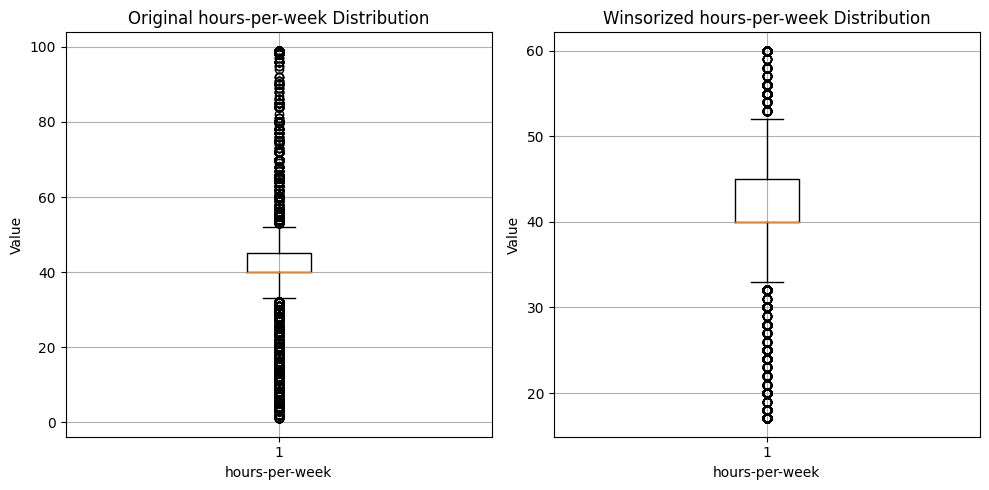

In [702]:
for column in adult_data.columns:
  if adult_data[column].dtype == 'int64':
    # Defining the limits for winsorization
    percentiles = adult_data[column].quantile([0.05, 0.95])
    lower_threshold = percentiles[0.05]
    upper_threshold = percentiles[0.95]

    winsorized_value = adult_data[column].copy()
    winsorized_value = np.clip(winsorized_value, lower_threshold, upper_threshold)

    # Plotting the before and after
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.boxplot(adult_data[column], showfliers=True)
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Original {column} Distribution')
    plt.grid(True)


    plt.subplot(122)
    plt.boxplot(winsorized_value, showfliers=True)
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Winsorized {column} Distribution')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Exploring the preprocessed dataset

In [703]:
# Exploring the metadata of the dataset
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [704]:
# Exploring the first few lines of the dataset
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [705]:
# Exploring the shape of the dataset
print(BLUE, f"This dataset has {adult_data.shape[0]} rows and {adult_data.shape[1]} columns", RESET)

 This dataset has 48842 rows and 15 columns 


In [706]:
# Accessing the decriptive statitics of the numerical data
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


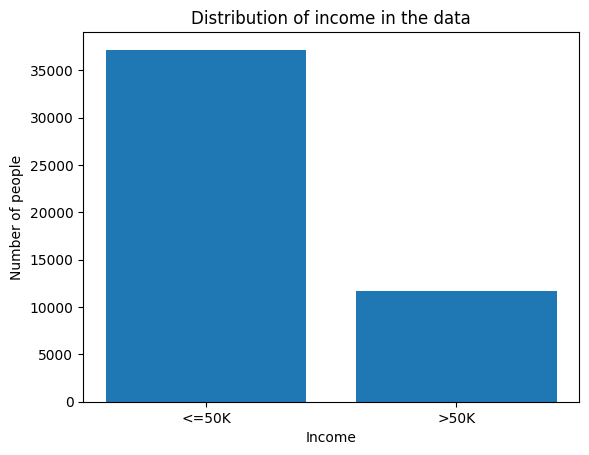

 <=50K    37155
>50K     11687
Name: income, dtype: int64 


In [707]:
# Exploring the distribution of income
income_counts = adult_data['income'].value_counts()
plt.bar(income_counts.index, income_counts.values)
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.title('Distribution of income in the data')
plt.show()
print(BLUE, income_counts, RESET)

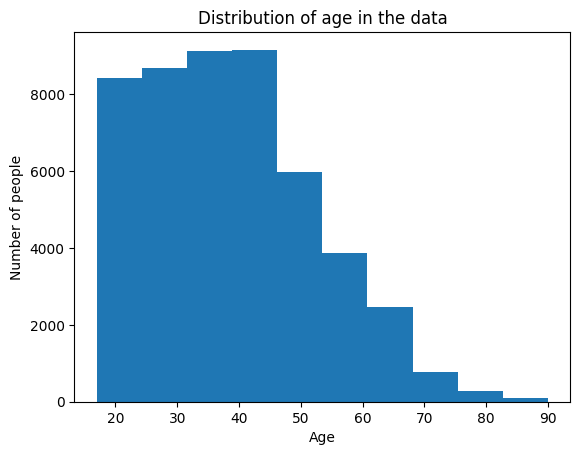

In [708]:
# Exploring the distribution of age
plt.hist(adult_data['age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of age in the data')
plt.show()

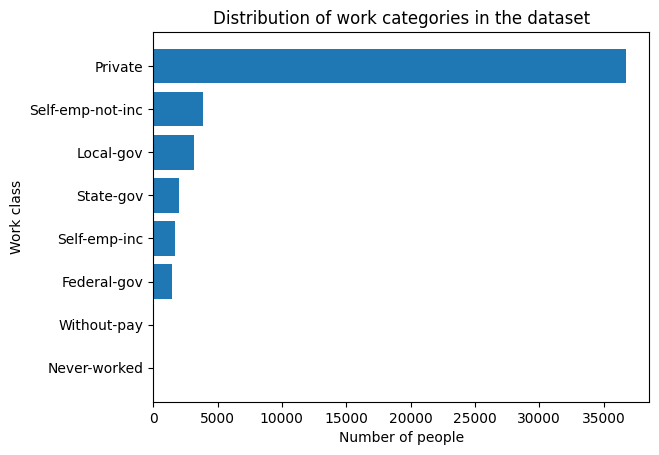

In [709]:
# Exploring the distribution of education
workclass_counts = adult_data['workclass'].value_counts()
plt.barh(workclass_counts.index, workclass_counts.values)
plt.xlabel('Number of people')
plt.ylabel('Work class')
plt.title('Distribution of work categories in the dataset')
plt.gca().invert_yaxis()
plt.show()

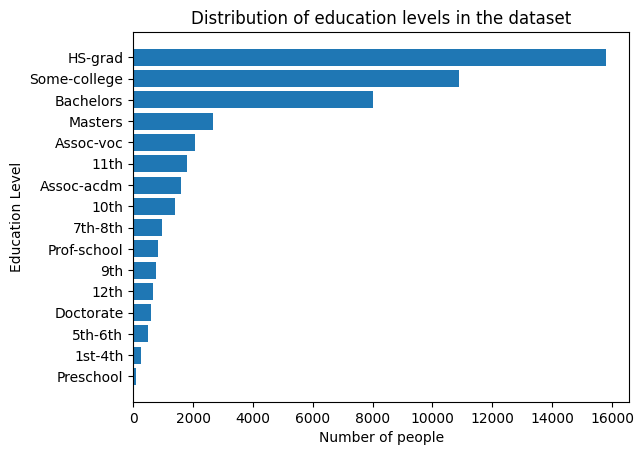

In [710]:
# Exploring the distribution of education
education_counts = adult_data['education'].value_counts()
plt.barh(education_counts.index, education_counts.values)
plt.xlabel('Number of people')
plt.ylabel('Education Level')
plt.title('Distribution of education levels in the dataset')
plt.gca().invert_yaxis()
plt.show()

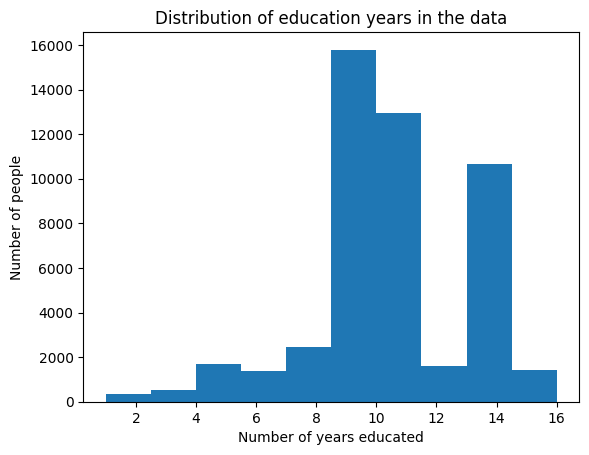

In [711]:
# Exploring the distribution of educated years
plt.hist(adult_data['education-num'])
plt.xlabel('Number of years educated')
plt.ylabel('Number of people')
plt.title('Distribution of education years in the data')
plt.show()

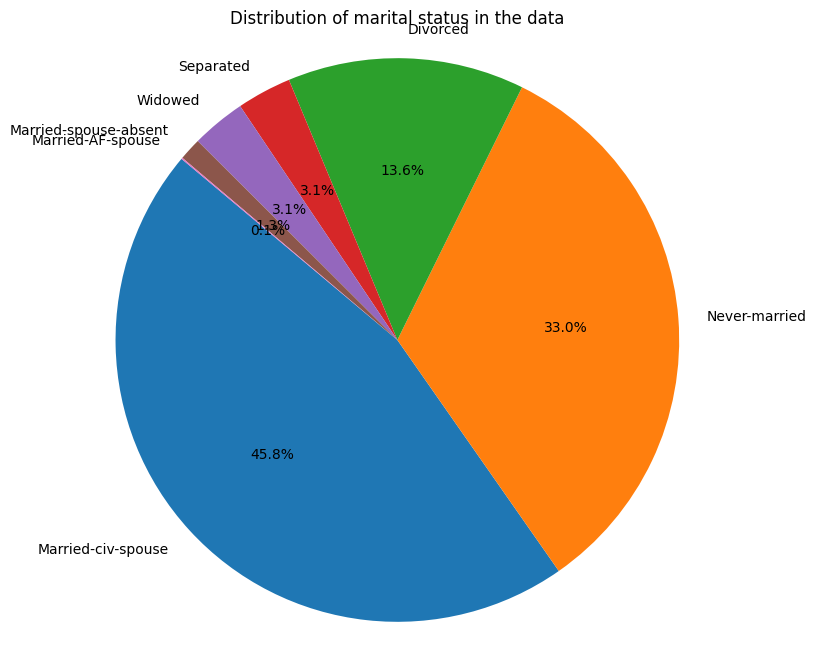

In [712]:
# Exploring the distribution of marital status
plt.figure(figsize=(8, 8))
plt.pie(adult_data['marital-status'].value_counts(), labels=adult_data['marital-status'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of marital status in the data')
plt.axis('equal')
plt.show()


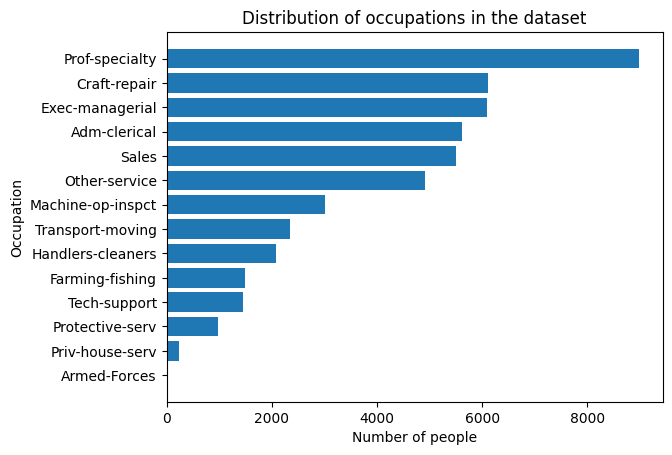

In [713]:
# Exploring the distribution of occupation
occupation_counts = adult_data['occupation'].value_counts()
plt.barh(occupation_counts.index, occupation_counts.values)
plt.xlabel('Number of people')
plt.ylabel('Occupation')
plt.title('Distribution of occupations in the dataset')
plt.gca().invert_yaxis()
plt.show()

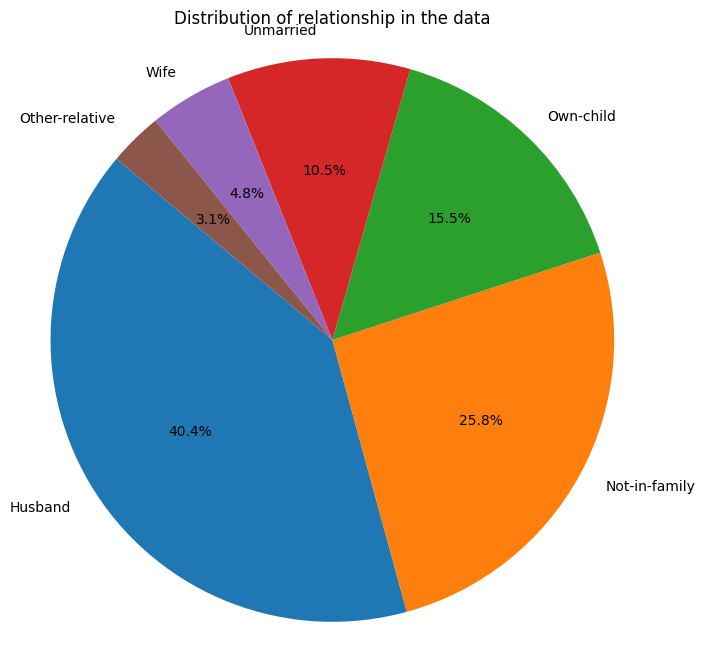

In [714]:
# Exploring the distribution of relationships
plt.figure(figsize=(8, 8))
plt.pie(adult_data['relationship'].value_counts(), labels=adult_data['relationship'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of relationship in the data')
plt.axis('equal')
plt.show()


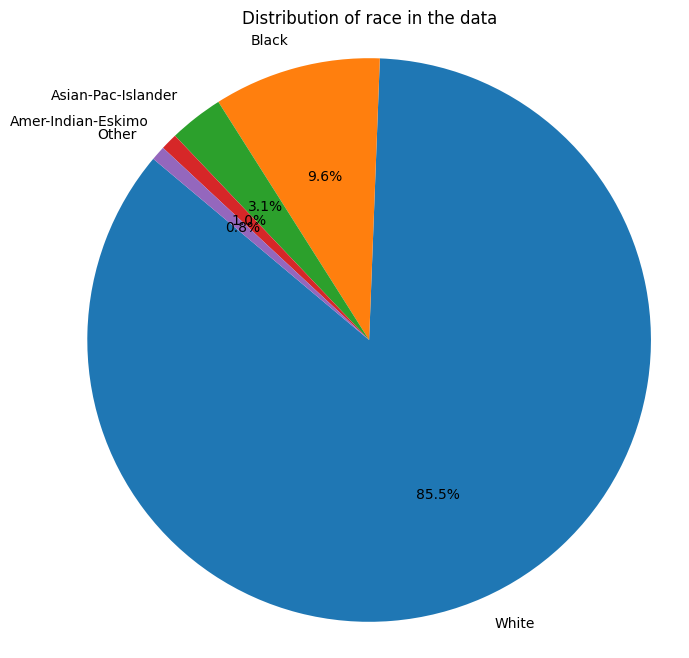

In [715]:
# Exploring the distribution of race
plt.figure(figsize=(8, 8))
plt.pie(adult_data['race'].value_counts(), labels=adult_data['race'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of race in the data')
plt.axis('equal')
plt.show()


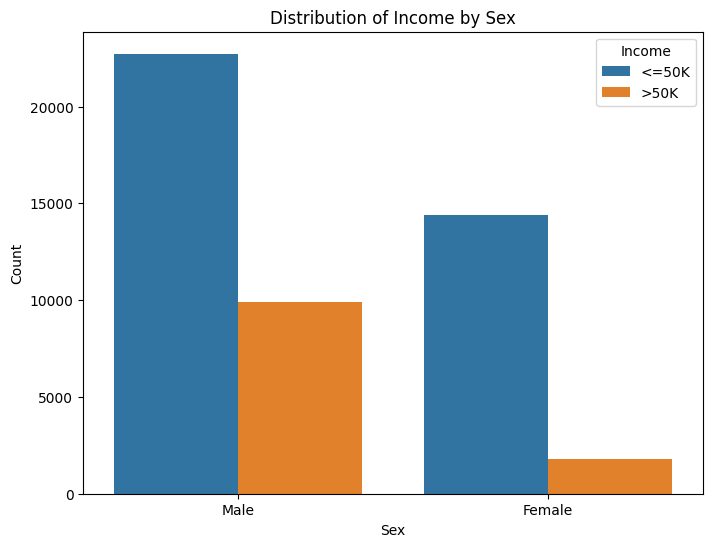

In [716]:
# Exploring the distribution of sex and income
plt.figure(figsize=(8, 6))
sns.countplot(data=adult_data, x='sex', hue='income')
plt.title('Distribution of Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


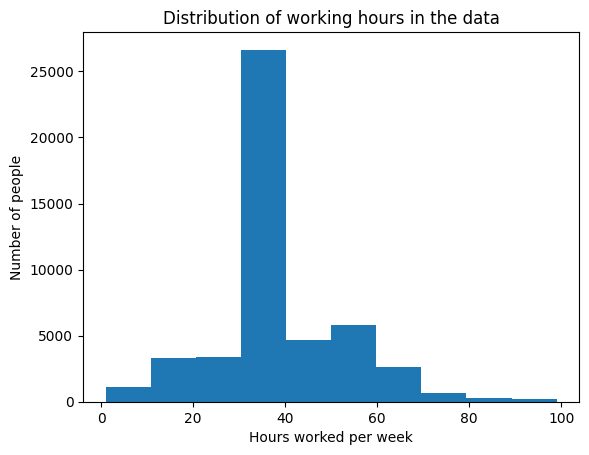

In [717]:
# Exploring the distribution of hours worked per week
plt.hist(adult_data['hours-per-week'])
plt.xlabel('Hours worked per week')
plt.ylabel('Number of people')
plt.title('Distribution of working hours in the data')
plt.show()

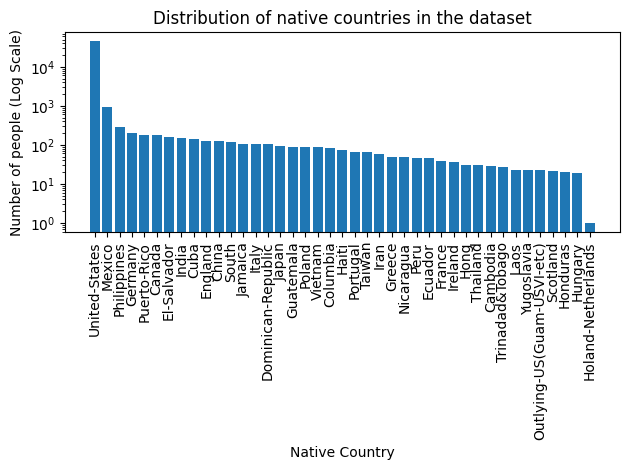

In [718]:
# Exploring the distribution of native countries
native_country_counts = adult_data['native-country'].value_counts()

# Create the bar chart with logarithmic scale on y-axis
plt.bar(native_country_counts.index, native_country_counts.values)
plt.yscale('log')
plt.xlabel('Native Country')
plt.ylabel('Number of people (Log Scale)')
plt.title('Distribution of native countries in the dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Feature Engineering
## Encoding the dataset, feature selection, feature scaling, handling imbalanced classes

In [829]:
# Using label encoding to convert the textual data to numerical
for column in adult_data.columns:
  if adult_data[column].dtypes == 'object':
        label_encoder = sklearn.preprocessing.LabelEncoder()
        adult_data[column] = label_encoder.fit_transform(adult_data[column])
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [830]:
# Feature scaling using standardization
feature_scaler = sklearn.preprocessing.StandardScaler()
feature_scaled_data = feature_scaler.fit_transform(adult_data)
feature_scaled_data = pd.DataFrame(feature_scaled_data, columns=adult_data.columns)
feature_scaled_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.025996,2.611034,-1.061979,-0.332542,1.136512,0.916138,-1.550298,-0.276685,0.392384,0.70422,0.146932,-0.217127,-0.034087,0.259694,-0.560845
1,0.828308,1.710780,-1.007104,-0.332542,1.136512,-0.410397,-0.794402,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-2.213032,0.259694,-0.560845
2,-0.046942,-0.089727,0.246034,0.183660,-0.419335,-1.736932,-0.290471,-0.276685,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
3,1.047121,-0.089727,0.426663,-2.397350,-1.197259,-0.410397,-0.290471,-0.900852,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
4,-0.776316,-0.089727,1.408530,-0.332542,1.136512,-0.410397,0.717391,2.219984,-1.971746,-1.42001,-0.144804,-0.217127,-0.034087,-5.377402,-0.560845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,-0.089727,0.243884,-0.332542,1.136512,-1.736932,0.717391,-0.276685,0.392384,-1.42001,-0.144804,-0.217127,-0.356894,0.259694,-0.560845
48838,1.849433,-0.089727,1.247492,0.183660,-0.419335,2.242673,0.717391,0.347482,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
48839,-0.046942,-0.089727,1.754865,-0.332542,1.136512,-0.410397,0.717391,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.259694,-0.560845
48840,0.390683,-0.089727,-1.001612,-0.332542,1.136512,-1.736932,-1.550298,0.971649,-3.153810,0.70422,0.587220,-0.217127,-0.034087,0.259694,-0.560845


In [831]:
# Verfiying the conversion
feature_scaled_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.025996,2.611034,-1.061979,-0.332542,1.136512,0.916138,-1.550298,-0.276685,0.392384,0.70422,0.146932,-0.217127,-0.034087,0.259694,-0.560845
1,0.828308,1.710780,-1.007104,-0.332542,1.136512,-0.410397,-0.794402,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-2.213032,0.259694,-0.560845
2,-0.046942,-0.089727,0.246034,0.183660,-0.419335,-1.736932,-0.290471,-0.276685,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
3,1.047121,-0.089727,0.426663,-2.397350,-1.197259,-0.410397,-0.290471,-0.900852,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
4,-0.776316,-0.089727,1.408530,-0.332542,1.136512,-0.410397,0.717391,2.219984,-1.971746,-1.42001,-0.144804,-0.217127,-0.034087,-5.377402,-0.560845


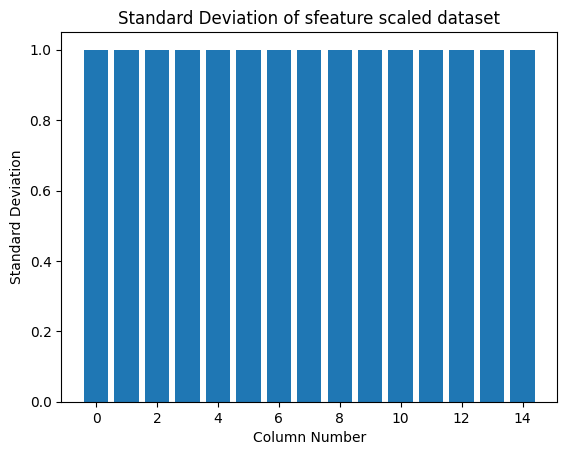

In [832]:
# Verifying the feature scale using standard deviation
plt.bar(range(len(feature_scaled_data.std())), feature_scaled_data.std())
plt.title("Standard Deviation of sfeature scaled dataset")
plt.xlabel("Column Number")
plt.ylabel("Standard Deviation")
plt.show()

In [833]:
# Seperating the independant features from the target
independant_df = feature_scaled_data.drop("income", axis = 1)
dependant_df = feature_scaled_data["income"]

# Running the correlation matrix to find the most affecting values
sorted_attributes = abs(feature_scaled_data.corr()['income']).sort_values()

# Removing the least influencing values
for i in range(len(sorted_attributes)):
    if sorted_attributes.iloc[i] < 0.03:
        feature_to_remove = sorted_attributes.index[i]
        independant_df = independant_df.drop(feature_to_remove, axis=1)
        print(f"The column '{feature_to_remove}' is being removed since its absolute correlation with income is {sorted_attributes.iloc[i].round(2)}.")

The column 'workclass' is being removed since its absolute correlation with income is 0.0.
The column 'fnlwgt' is being removed since its absolute correlation with income is 0.01.
The column 'native-country' is being removed since its absolute correlation with income is 0.02.


In [834]:
# Verifying the feature selection
independant_df

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,0.025996,-0.332542,1.136512,0.916138,-1.550298,-0.276685,0.392384,0.70422,0.146932,-0.217127,-0.034087
1,0.828308,-0.332542,1.136512,-0.410397,-0.794402,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-2.213032
2,-0.046942,0.183660,-0.419335,-1.736932,-0.290471,-0.276685,0.392384,0.70422,-0.144804,-0.217127,-0.034087
3,1.047121,-2.397350,-1.197259,-0.410397,-0.290471,-0.900852,-1.971746,0.70422,-0.144804,-0.217127,-0.034087
4,-0.776316,-0.332542,1.136512,-0.410397,0.717391,2.219984,-1.971746,-1.42001,-0.144804,-0.217127,-0.034087
...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,-0.332542,1.136512,-1.736932,0.717391,-0.276685,0.392384,-1.42001,-0.144804,-0.217127,-0.356894
48838,1.849433,0.183660,-0.419335,2.242673,0.717391,0.347482,-1.971746,0.70422,-0.144804,-0.217127,-0.034087
48839,-0.046942,-0.332542,1.136512,-0.410397,0.717391,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930
48840,0.390683,-0.332542,1.136512,-1.736932,-1.550298,0.971649,-3.153810,0.70422,0.587220,-0.217127,-0.034087


In [835]:
# Selecting the minority class from the dependant dataframe
minority_class = dependant_df.value_counts().idxmin()

# Copying the features and target dataframes for oversampling
X = independant_df.copy()
y = dependant_df.copy()

# Oversampling the minority class
minority_X = X[y == minority_class]
minority_y = y[y == minority_class]
oversampled_minority = sklearn.utils.resample(minority_X, replace=True, n_samples=len(y[y != minority_class]))
oversampled_minority_y = pd.Series([minority_class] * len(oversampled_minority))

# Combining oversampled minority with majority class data
oversampled_x = pd.concat([oversampled_minority, X[y != minority_class]])
oversampled_y = pd.concat([oversampled_minority_y, y[y != minority_class]])

# Verifying the balance
print(oversampled_y.value_counts())


 1.783024    37155
-0.560845    37155
dtype: int64


# Training & Testing Split

Dividing the oversampled dataframes into training and testing

In [836]:
# Dividing each oversampled dataframe into training and testing splits with a 1:4 ratio
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(oversampled_x, oversampled_y, test_size=0.2)

In [876]:
# Implementing the naive bayes classification
naive_bayes_model = sklearn.naive_bayes.GaussianNB()

# Converting the continous features to discrete (assuming threshold is set)
Y_training_discrete = np.where(Y_train > threshold, 1, 0)
Y_testing_discrete = np.where(Y_test > threshold, 1, 0)

# Training the model
naive_bayes_model.fit(X_train, Y_training_discrete)
Y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluating the classifier
naive_bayes_accuracy = round(sklearn.metrics.accuracy_score(Y_testing_discrete, Y_pred_nb) * 100, 2)
naive_bayes_f1_score = round(sklearn.metrics.f1_score(Y_testing_discrete, Y_pred_nb) * 100, 2)
naive_bayes_report = sklearn.metrics.classification_report(Y_testing_discrete, Y_pred_nb)

print(BLUE, '=================== SCORES FOR THE NAIVE BAYES CLASSIFIER ===================')
print('Accuracy score:', naive_bayes_accuracy)
print('F1 score:', naive_bayes_f1_score)

 =================== SCORES FOR THE NAIVE BAYES CLASSIFIER ===================
Accuracy score: 70.52
F1 score: 61.7


In [867]:
# Implementing the random forest classification
random_forest_model = sklearn.ensemble.RandomForestClassifier()

# Converting the continous features to discrete (assuming threshold is set)
threshold = 0
Y_train_discrete = np.where(Y_train > threshold, 1, 0)
Y_test_discrete = np.where(Y_test > threshold, 1, 0)
X_test_discrete = np.where(X_test > threshold, 1, 0)

# Training the model
random_forest_model.fit(X_train, Y_train_discrete)
Y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the classifier
random_forest_accuracy = round(sklearn.metrics.accuracy_score(Y_test_discrete, Y_pred_rf) * 100, 2)
random_forest_f1_score = round(sklearn.metrics.f1_score(Y_test_discrete, Y_pred_rf) * 100, 2)
random_forest_report = sklearn.metrics.classification_report(Y_test_discrete, Y_pred_rf)

print(BLUE, '=================== SCORES FOR THE RANDOM FOREST CLASSIFIER ===================')
print('Accuracy score:', random_forest_accuracy)
print('F1 score:', random_forest_f1_score)

 =================== SCORES FOR THE RANDOM FOREST CLASSIFIER ===================
Accuracy score: 90.66
F1 score: 91.09


# Optimal Evaluation Metrics

In [862]:
# Comparing the accuracy and F1 score between the two models
print(GREEN, f"Naive Bayes.  : Accuracy - {naive_bayes_accuracy} | F1 Score - {naive_bayes_f1_score}")
print(GREEN, f"Random Forest : Accuracy - {random_forest_accuracy} | F1 Score - {random_forest_f1_score}")

 Naive Bayes.  : Accuracy - 70.52 | F1 Score - 61.7
 Random Forest : Accuracy - 90.65 | F1 Score - 91.06


In [860]:
# Comparing the precision and the recall between the two models
print(GREEN, "=================== Naive Bayes Statistics ===================")
print("Precision and Recall statistics :")
print(naive_bayes_report)
print("\n")

 =================== Naive Bayes Statistics ===================
Precision and Recall statistics :
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      7459
           1       0.87      0.48      0.62      7403

    accuracy                           0.71     14862
   macro avg       0.76      0.70      0.69     14862
weighted avg       0.76      0.71      0.69     14862





In [861]:
# Comparing the precision and the recall between the two models
print(GREEN, "=================== Random Forest Statistics ===================")
print("Precision and Recall statistics :")
print(random_forest_report)
print("\n")

 =================== Naive Bayes Statistics ===================
Precision and Recall statistics :
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7459
           1       0.87      0.96      0.91      7403

    accuracy                           0.91     14862
   macro avg       0.91      0.91      0.91     14862
weighted avg       0.91      0.91      0.91     14862





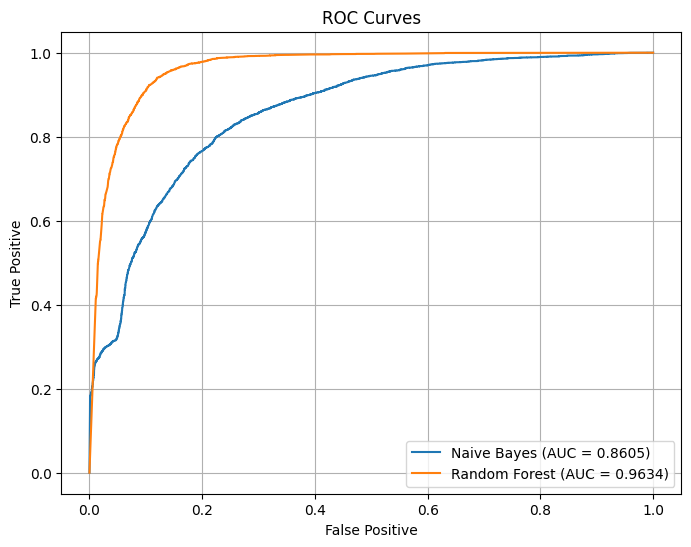

In [873]:
# Calculating the ROC curve for Naive Bayes
y_proba_nb = naive_bayes_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (> $50K)
fpr_nb, tpr_nb, thresholds_nb = sklearn.metrics.roc_curve(Y_test_discrete, y_proba_nb)
auc_nb = sklearn.metrics.roc_auc_score(Y_test_discrete, y_proba_nb)

# Calculating the ROC curve for Random Forest
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (> $50K)
fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(Y_test_discrete, y_proba_rf)
auc_rf = sklearn.metrics.roc_auc_score(Y_test_discrete, y_proba_rf)

# Plotting both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.4f)' % auc_nb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.4f)' % auc_rf)
plt.title('ROC Curves')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.grid(True)
plt.show()
